### 실리콘 밸리에는 누가 일할까? II

이번에는 어도비(Adobe)의 직원 분포를 한 번 살펴봅시다.

어도비 전체 직원들의 직군 분포를 파이 그래프로 그려보세요.

(인원이 0인 직군은 그래프에 표시되지 않아야 합니다.)

In [1]:
%matplotlib inline
import pandas as pd

In [22]:
df = pd.read_csv('../data/silicon_valley_details.csv')
df

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0
...,...,...,...,...,...,...
4435,Sanmina,2016,Overall_totals,NaN,laborers and helpers,4
4436,Sanmina,2016,Overall_totals,NaN,Service workers,57
4437,Sanmina,2016,Overall_totals,NaN,Totals,5205
4438,Sanmina,2016,Overall_totals,NaN,Previous_totals,5615


In [29]:
# company가 Adobe인 직원 조건, 인원이 0인 직군도 제외
condition = (df['company'] == 'Adobe') & (df['count'] != 0) & (df['race'] == 'Overall_totals')
    # 각 직군 내의 인종 정보가 전부 파이차트에 표시되지 않도록
    # 각각의 직군 전체 인원을 count한 overall totals 데이터 활용.

# job_category가 total 어쩌구인 행 제거
except_total = (df['job_category'] != 'Totals') & (df['job_category'] != 'Previous_totals')

# 해당 조건을 만족하는 행만 데이터프레임으로 저장
adobe_df = df.loc[condition&except_total, ]

# adobe_df의 인덱스 설정 - 그냥 사용하면 인덱스가 직군명이 아니라 번호로 나옴.
adobe_df.set_index('job_category', inplace=True)

adobe_df

,company,year,race,gender,count
job_category,,,,,
Executives,Adobe,2016,Overall_totals,NaN,93
Managers,Adobe,2016,Overall_totals,NaN,2448
Professionals,Adobe,2016,Overall_totals,NaN,3028
Sales workers,Adobe,2016,Overall_totals,NaN,1270
Administrative support,Adobe,2016,Overall_totals,NaN,323


<Axes: ylabel='count'>

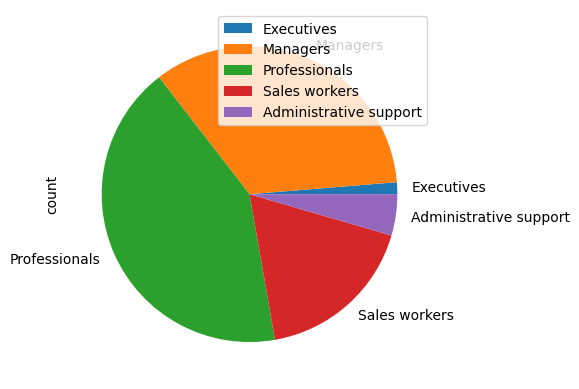

In [30]:
# 파이차트 그리기
adobe_df.plot(kind='pie', y='count')